In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot() 

In [4]:
## Constants

# Gravitational constant
G = 6.67430e-11  # m^3 kg^-1 s^-2

# 1 AU (Astronomical Unit)
au = 149597870700  # meters

# Sun
M_sun = 1.9891e30  # kg
R_sun = 6.9634e8  # meters
GM_sun = 1.32712440018e20  # m^3/s^2

# Earth
M_earth = 5.9722e24  # kg
R_earth = 6.371e6  # meters
a_earth = 1.0 * au  # meters
T_earth = 365.25 * 24 * 3600  # seconds
GM_earth = 3.986004418e14  # m^3/s^2

# Jupiter
M_jupiter = 1.8982e27  # kg
R_jupiter = 6.9911e7  # meters
a_jupiter = 5.2044 * au  # meters
T_jupiter = 4332.59 * 24 * 3600  # seconds
GM_jupiter = 1.26686534e17  # m^3/s^2

# Saturn
M_saturn = 5.6834e26  # kg
R_saturn = 5.8232e7  # meters
a_saturn = 9.5826 * au  # meters
T_saturn = 10759.22 * 24 * 3600  # seconds
GM_saturn = 3.7931187e16  # m^3/s^2

# Mercury
M_mercury = 3.3011e23  # kg
R_mercury = 2.4397e6  # meters
a_mercury = 0.3871 * au  # meters
T_mercury = 87.97 * 24 * 3600  # seconds
GM_mercury = 2.2032e13  # m^3/s^2

# Venus
M_venus = 4.8675e24  # kg
R_venus = 6.0518e6  # meters
a_venus = 0.7233 * au  # meters
T_venus = 224.70 * 24 * 3600  # seconds
GM_venus = 3.24859e14  # m^3/s^2

# Mars
M_mars = 6.4171e23  # kg
R_mars = 3.3895e6  # meters
a_mars = 1.5237 * au  # meters
T_mars = 686.98 * 24 * 3600  # seconds
GM_mars = 4.282837e13  # m^3/s^2

# Neptune
M_neptune = 1.02413e26  # kg
R_neptune = 2.4622e7  # meters
a_neptune = 30.07 * au  # meters
T_neptune = 60182 * 24 * 3600  # seconds
GM_neptune = 6.836529e15  # m^3/s^2

# Uranus
M_uranus = 8.6810e25  # kg
R_uranus = 2.5362e7  # meters
a_uranus = 19.2184 * au  # meters
T_uranus = 30688.5 * 24 * 3600  # seconds
GM_uranus = 5.793939e15  # m^3/s^2

## Orbital parameters

#(Epoch J2000)

orbital_parameters = {
    "Mercury": {
        "a": 0.387098,        # AU    # semi-major axis
        "e": 0.205630,                # eccentricity
        "i": 7.00487,         # deg   # inclination
        "Omega": 48.33167,    # deg   # LAN
        "omega": 29.12478,    # deg   # Arg Perihelion
        "M0": 174.79588       # deg   # Mean Anomaly in J200
    },
    "Venus": {
        "a": 0.723332,
        "e": 0.006773,
        "i": 3.39471,
        "Omega": 76.68069,
        "omega": 54.85229,
        "M0": 50.41611
    },
    "Earth": {
        "a": 1.000000,
        "e": 0.016710,
        "i": 0.00005,
        "Omega": -11.26064,
        "omega": 114.20783,
        "M0": 358.617
    },
    "Mars": {
        "a": 1.523679,
        "e": 0.093400,
        "i": 1.85061,
        "Omega": 49.57854,
        "omega": 286.46230,
        "M0": 19.41248
    },
    "Jupiter": {
        "a": 5.204267,
        "e": 0.048775,
        "i": 1.30530,
        "Omega": 100.55615,
        "omega": 273.867,
        "M0": 20.0202
    },
    "Saturn": {
        "a": 9.582017,
        "e": 0.055723,
        "i": 2.48446,
        "Omega": 113.71504,
        "omega": 339.392,
        "M0": 317.0207
    },
    "Uranus": {
        "a": 19.18926,
        "e": 0.044405,
        "i": 0.76986,
        "Omega": 74.22988,
        "omega": 96.998857,
        "M0": 142.2386
    },
    "Neptune": {
        "a": 30.069922,
        "e": 0.011214,
        "i": 1.76917,
        "Omega": 131.72169,
        "omega": 272.8461,
        "M0": 256.228
    }
}

## Apophis Parameters
# Mass of Apophis (assumed)
M_apophis = 6.1e10  # kg
apophis_orbital_parameters = {
    "a": 0.9224,         # Semi-major axis in AU
    "e": 0.1911,         # Eccentricity
    "i": 3.341,          # Inclination in degrees
    "Omega": 203.9,      # Longitude of Ascending Node in degrees
    "omega": 126.7,      # Argument of Perihelion in degrees
    "M0": 90.28,         # Mean Anomaly at epoch (May 5, 2025) in degrees
    "M0_J2000_apophis" : 333.26,  # degrees
    "epoch_jd": 2460800.5,  # Julian Date of epoch
    "P": 323.6,          # Orbital period in days
    "mean_motion": 1.112,  # degrees/day
    "avg_speed": 30.73   # km/s
}



In [ ]:
def kinematic_rk4(t, f, r0, v0):
    # Simulation loop
    #time_start = time.time()
    dt = t[1] - t[0]  # Assuming uniform time steps
    half_dt = dt / 2
    # Initialize arrays to store positions, velocities, and accelerations
    dim = len(r0)
    r = np.zeros((len(t), dim))  # Position array
    v = np.zeros((len(t), dim))  # Velocity array
    a = np.zeros((len(t), dim))  # Acceleration array
    # Set initial conditions
    r[0] = r0
    v[0] = v0
    a[0] = f(t[0], r0, v0)
    for i in range(len(t) - 1):
        t_i = t[i]
        r_i = r[i]
        v_i = v[i]
        # RK4 coefficients for velocity
        k1_v = f(t_i, r_i, v_i)
        k2_v = f(t_i + half_dt, r_i + v_i * half_dt, v_i + k1_v * half_dt)
        k3_v = f(t_i + half_dt, r_i + v_i * half_dt, v_i + k2_v * half_dt)
        k4_v = f(t_i + dt, r_i + v_i * dt, v_i + k3_v * dt)
        # RK4 coefficients for position
        k1_r = v_i
        k2_r = v_i + k1_v * half_dt
        k3_r = v_i + k2_v * half_dt
        k4_r = v_i + k3_v * dt
        # Update velocity and position
        v[i + 1] = v_i + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) * dt / 6
        r[i + 1] = r_i + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) * dt / 6
        # Update acceleration for the next step
        a[i + 1] = f(t[i + 1], r[i + 1], v[i + 1])
        #progress_bar(i,len(t)-1,time_start)
    return r, v, a

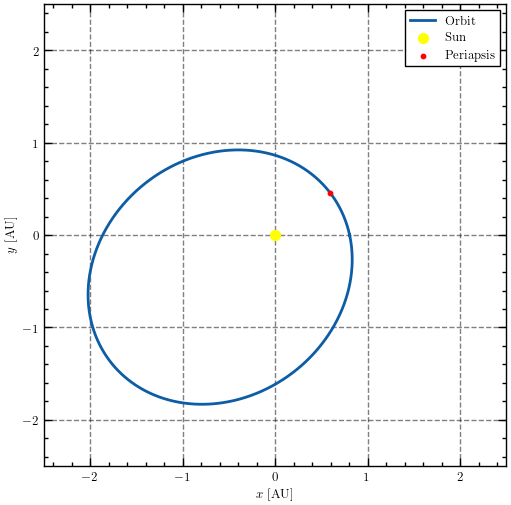

In [5]:
# Orbital parameters
theta = np.linspace(0, 2 * np.pi, 2000)
e = 0.5
a = 1.5  # AU
omega = np.deg2rad(37.345)  # Argument of periapsis

# Apply the argument of periapsis directly to the radial equation
r = (a * (1 - e**2)) / (1 + e * np.cos(theta - omega))

def r_radial_convert(theta, a, e, omega):
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta - omega))
    return r

# Convert to Cartesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Periapsis point (occurs at θ = ω)
r_peri = a * (1 - e)
x_peri = r_peri * np.cos(omega)
y_peri = r_peri * np.sin(omega)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, label="Orbit", zorder = 1)
plt.scatter(0, 0, color='yellow', s=50, label="Sun", zorder = 2)          # s is area
plt.scatter(x_peri, y_peri, color='red', s=10, label="Periapsis", zorder = 2)
plt.xlabel("$x$ [AU]")
plt.ylabel("$y$ [AU]")
plt.legend()
plt.gca().set_aspect('equal')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.show()